In [ ]:
import tkinter as tk
from PIL import ImageGrab, ImageImageDraw
import numpy as np
import os

In [64]:
# 使用 tkinter 創建一個簡單的手寫數字書寫應用，儲存起來
class DrawingApp:
    def __init__(self, root):
        self.root = root
        self.root.title("數字書寫應用")
        self.canvas = tk.Canvas(root, width=200, height=200, bg="black")
        self.canvas.pack()

        # 用於記錄筆跡，設置為黑底
        self.image = Image.new("RGB", (200, 200), "black")
        self.draw = ImageDraw.Draw(self.image)

        # 按鈕
        self.save_button = tk.Button(root, text="保存圖像", command=self.save_image)
        self.save_button.pack(side=tk.LEFT)

        self.clear_button = tk.Button(root, text="清除", command=self.clear_canvas)
        self.clear_button.pack(side=tk.LEFT)

        # 綁定事件
        self.canvas.bind("<B1-Motion>", self.paint)

        # 自動保存的資料夾
        self.save_folder = "save_digits"
        if not os.path.exists(self.save_folder):
            os.makedirs(self.save_folder)

    def paint(self, event):
        x, y = event.x, event.y
        # 設定畫筆粗細
        brush_size = 10
        # 在畫布上畫白色圓形
        self.canvas.create_oval(x - brush_size, y - brush_size, x + brush_size, y + brush_size, fill="white", outline="white")
        # 在Pillow圖像中畫白色圓形
        self.draw.ellipse([x - brush_size, y - brush_size, x + brush_size, y + brush_size], fill="white")

    def save_image(self):
        # 找到目前已存在的文件數量來確定新文件名
        existing_files = [f for f in os.listdir(self.save_folder) if f.startswith("test") and f.endswith(".png")]
        next_number = len(existing_files)  # 從 0 開始編號
        filename = f"test{next_number:03}.png"  # 生成 test000, test001 等文件名格式
        file_path = os.path.join(self.save_folder, filename)
        
        self.image.save(file_path)
        print(f"圖像已自動保存到: {file_path}")

    def clear_canvas(self):
        # 清除畫布
        self.canvas.delete("all")
        # 重置 Pillow 的圖像為黑底
        self.image = Image.new("RGB", (200, 200), "black")
        self.draw = ImageDraw.Draw(self.image)
        print("畫布已清除")

# 啟動應用程式
root = tk.Tk()
app = DrawingApp(root)
root.mainloop()


In [49]:
# test

import cv2
import numpy as np
import os

# 定義文件夾路徑
input_folder_path = "save_digits"
output_folder_path = "save_digits/cv2"

# 創建輸出文件夾（如果不存在）
os.makedirs(output_folder_path, exist_ok=True)

# 定義處理圖像的函數
def process_image(image_path):
    # 讀取圖像
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 將圖像二值化為黑白
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # 找到圖像中的前景（白色部分）的邊界
    x, y, w, h = cv2.boundingRect(binary_image)

    # 裁剪出圖像中的數字部分
    cropped_image = binary_image[y:y+h, x:x+w]

    # 將裁剪的圖像調整為 9x6 大小
    resized_image = cv2.resize(cropped_image, (6, 9), interpolation=cv2.INTER_NEAREST)

    # 展平成向量
    flattened_image = resized_image.flatten()

    return flattened_image

# 處理文件夾中的每張圖像並保存
for i in range(0, 10):  # 假設文件名為 test000.png 到 test009.png
    image_path = os.path.join(input_folder_path, f"test{i:03}.png")
    output_path = os.path.join(output_folder_path, f"{i:02}.npy")
    
    if os.path.exists(image_path):
        flattened_image = process_image(image_path)
        # 將處理後的向量保存為 .npy 文件
        np.save(output_path, flattened_image)
        print(f"Processed and saved {image_path} to {output_path}")
    else:
        print(f"File {image_path} does not exist.")


Processed and saved save_digits\test000.png to save_digits/cv2\00.npy
Processed and saved save_digits\test001.png to save_digits/cv2\01.npy
Processed and saved save_digits\test002.png to save_digits/cv2\02.npy
Processed and saved save_digits\test003.png to save_digits/cv2\03.npy
Processed and saved save_digits\test004.png to save_digits/cv2\04.npy
Processed and saved save_digits\test005.png to save_digits/cv2\05.npy
Processed and saved save_digits\test006.png to save_digits/cv2\06.npy
Processed and saved save_digits\test007.png to save_digits/cv2\07.npy
Processed and saved save_digits\test008.png to save_digits/cv2\08.npy
Processed and saved save_digits\test009.png to save_digits/cv2\09.npy


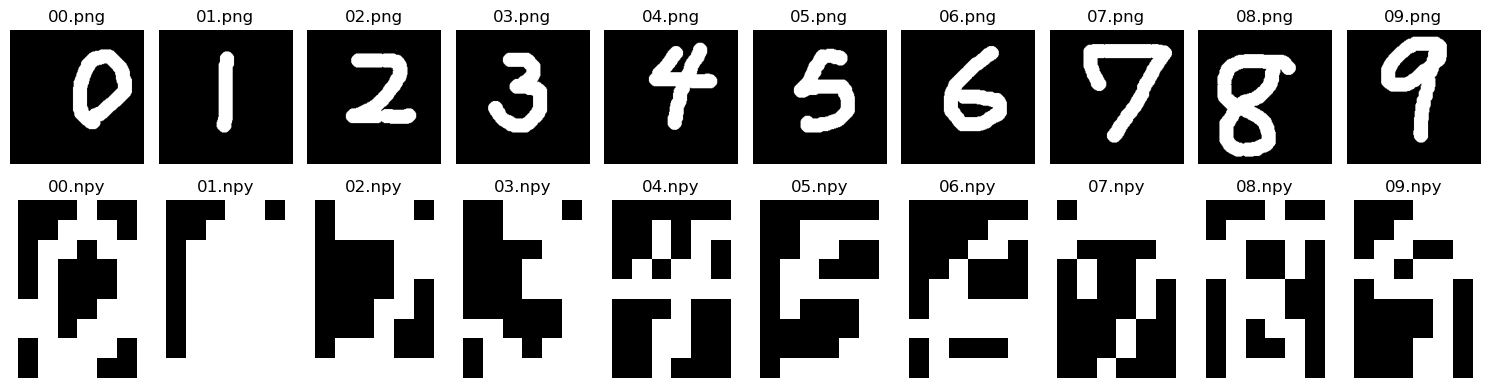

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# 定義文件夾路徑
npy_folder_path = "save_digits/cv2"  # .npy 文件夾
png_folder_path = "save_digits"         # .png 文件夾

# 創建一個子圖，三行並排顯示 00.npy 到 09.npy 的圖像和相應的原始圖像
fig, axes = plt.subplots(2, 10, figsize=(15, 4))  # 兩行：第一行顯示原始 PNG，第二行顯示 NPY

for i in range(10):
    # 加載 .npy 文件
    npy_file_path = os.path.join(npy_folder_path, f"{i:02}.npy")
    ax_npy = axes[1, i]  # NPY 圖片顯示在第二行
    
    if os.path.exists(npy_file_path):
        loaded_data = np.load(npy_file_path)
        reshaped_image = loaded_data.reshape((9, 6))
        ax_npy.imshow(reshaped_image, cmap='gray')
        ax_npy.set_title(f"{i:02}.npy")
        ax_npy.axis("off")
    else:
        print(f"File {npy_file_path} does not exist.")

    # 加載 .png 文件
    png_file_path = os.path.join(png_folder_path, f"test{i:03}.png")
    ax_png = axes[0, i]  # PNG 圖片顯示在第一行

    if os.path.exists(png_file_path):
        img = Image.open(png_file_path).convert("L")  # 轉換為灰階
        ax_png.imshow(img, cmap='gray')
        ax_png.set_title(f"{i:02}.png")
        ax_png.axis("off")
    else:
        print(f"File {png_file_path} does not exist.")

# 調整布局並顯示所有圖像
plt.tight_layout()
plt.show()


下面使用資料夾來進行測試查看正確率

In [67]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x))
        return exp_x / exp_x.sum(axis=1, keepdims=True)

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = self.softmax(self.output_input)
        return self.output

    def backward(self, X, y, learning_rate):
        n_samples = X.shape[0]
        output_error = self.output - y
        d_weights_hidden_output = np.dot(self.hidden_output.T, output_error) / n_samples
        d_bias_output = np.sum(output_error, axis=0, keepdims=True) / n_samples
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * self.sigmoid_derivative(self.hidden_output)
        d_weights_input_hidden = np.dot(X.T, hidden_error) / n_samples
        d_bias_hidden = np.sum(hidden_error, axis=0, keepdims=True) / n_samples
        self.weights_hidden_output -= learning_rate * d_weights_hidden_output
        self.bias_output -= learning_rate * d_bias_output
        self.weights_input_hidden -= learning_rate * d_weights_input_hidden
        self.bias_hidden -= learning_rate * d_bias_hidden

    def train(self, X, y, epochs, learning_rate):
        losses = []
        for epoch in range(epochs):
            output = self.forward(X)
            loss = -np.mean(np.sum(y * np.log(output + 1e-15), axis=1))  # Cross-entropy loss
            self.backward(X, y, learning_rate)
            losses.append(loss)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        return losses

    # 新增的 predict 方法，用於單獨輸入的預測
    def predict(self, X):
        output = self.forward(X)
        predictions = np.argmax(output, axis=1)
        return predictions

    def evaluate(self, X, y):
        predictions = np.argmax(self.forward(X), axis=1)
        true_labels = np.argmax(y, axis=1)
        accuracy = np.mean(predictions == true_labels)
        correct_indices = np.where(predictions == true_labels)[0]
        incorrect_indices = np.where(predictions != true_labels)[0]
        return accuracy, correct_indices, incorrect_indices, predictions, true_labels
    
    def save_model(self, file_path):
        np.savez(file_path,
                weights_input_hidden=self.weights_input_hidden,
                bias_hidden=self.bias_hidden,
                weights_hidden_output=self.weights_hidden_output,
                bias_output=self.bias_output)
        print(f"Model saved to {file_path}")
        
    def load_model(self, file_path):
        data = np.load(file_path)
        self.weights_input_hidden = data["weights_input_hidden"]
        self.bias_hidden = data["bias_hidden"]
        self.weights_hidden_output = data["weights_hidden_output"]
        self.bias_output = data["bias_output"]
        print(f"Model loaded from {file_path}")


In [68]:
# 加載測試數據
def load_test_data(folder_path, labels):
    data = []
    targets = []
    
    for label in labels:
        file_path = os.path.join(folder_path, f"{label:02}.npy")
        if os.path.exists(file_path):
            # 加載展平的圖像向量
            image_vector = np.load(file_path)
            data.append(image_vector)
            # 假設 00.npy 對應數字 0, 01.npy 對應數字 1，以此類推
            targets.append(label)
        else:
            print(f"File {file_path} does not exist.")
    
    # 將數據轉換為 NumPy 陣列
    data = np.array(data)
    targets = np.array(targets)
    
    # One-hot 編碼標籤
    num_classes = len(labels)
    targets_one_hot = np.eye(num_classes)[targets]
    
    return data, targets_one_hot

In [69]:
# 測試數據文件夾和標籤
test_folder_path = "save_digits/cv2"
test_labels = list(range(10))  # 假設文件名為 00.npy 到 09.npy，代表數字 0 到 9

# 加載測試數據
X_test, y_test_one_hot = load_test_data(test_folder_path, test_labels)

# 加載模型並進行評估
mlp_loaded = MLP(input_size=54, hidden_size=64, output_size=10)
mlp_loaded.load_model("mlp_model09.npz")

# 使用加載的模型進行測試
accuracy, correct_indices, incorrect_indices, predictions, true_labels = mlp_loaded.evaluate(X_test, y_test_one_hot)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 列出正確分類的樣本
print("Correctly classified samples:")
for idx in correct_indices:
    print(f"Sample {idx:02}: Predicted {predictions[idx]}, True Label {true_labels[idx]}")

# 列出錯誤分類的樣本
print("Incorrectly classified samples:")
for idx in incorrect_indices:
    print(f"Sample {idx:02}: Predicted {predictions[idx]}, True Label {true_labels[idx]}")



Model loaded from mlp_model09.npz
Test Accuracy: 70.00%
Correctly classified samples:
Sample 01: Predicted 1, True Label 1
Sample 02: Predicted 2, True Label 2
Sample 03: Predicted 3, True Label 3
Sample 05: Predicted 5, True Label 5
Sample 06: Predicted 6, True Label 6
Sample 08: Predicted 8, True Label 8
Sample 09: Predicted 9, True Label 9
Incorrectly classified samples:
Sample 00: Predicted 1, True Label 0
Sample 04: Predicted 1, True Label 4
Sample 07: Predicted 2, True Label 7


測試即時讀出

In [70]:
import tkinter as tk
from PIL import Image, ImageDraw, ImageOps, ImageTk
import cv2
import numpy as np
import os

class DrawingApp:
    def __init__(self, root):
        self.root = root
        self.root.title("數字書寫應用")
        
        # 主畫布區域
        self.canvas_frame = tk.Frame(root)
        self.canvas_frame.pack(pady=10)

        # 畫布
        self.canvas = tk.Canvas(self.canvas_frame, width=200, height=200, bg="black")
        self.canvas.pack()

        # 用於記錄筆跡的黑底影像
        self.image = Image.new("RGB", (200, 200), "black")
        self.draw = ImageDraw.Draw(self.image)

        # 縮小後圖像顯示區域
        self.result_label = tk.Label(self.canvas_frame)
        self.result_label.pack(pady=10)

        # 預測結果文字顯示區域
        self.prediction_label = tk.Label(root, text="依照 MLP 模型，預測的數字為: 未知")
        self.prediction_label.pack(pady=5)

        # 按鈕區域
        self.button_frame = tk.Frame(root)
        self.button_frame.pack(pady=10)

        # 保存按鈕
        self.save_button = tk.Button(self.button_frame, text="保存圖像", command=self.save_and_show_image)
        self.save_button.pack(side=tk.LEFT, padx=10)

        # 清除按鈕
        self.clear_button = tk.Button(self.button_frame, text="清除", command=self.clear_canvas)
        self.clear_button.pack(side=tk.LEFT, padx=10)

        # 綁定畫筆繪製事件
        self.canvas.bind("<B1-Motion>", self.paint)

        # 即時保存的資料夾
        self.save_folder = "immediate_digits"
        if not os.path.exists(self.save_folder):
            os.makedirs(self.save_folder)

    def paint(self, event):
        x, y = event.x, event.y
        brush_size = 10
        # 畫布上繪製白色圓點
        self.canvas.create_oval(x - brush_size, y - brush_size, x + brush_size, y + brush_size, fill="white", outline="white")
        # 在Pillow圖像中繪製白色圓點
        self.draw.ellipse([x - brush_size, y - brush_size, x + brush_size, y + brush_size], fill="white")

    def save_and_show_image(self):
        # 轉換為灰階並二值化
        gray_image = self.image.convert("L")
        binary_image = gray_image.point(lambda p: p > 127 and 255)

        # 將二值化影像轉換為OpenCV格式
        binary_cv_image = np.array(binary_image)
        
        # 找到前景邊界並裁剪
        x, y, w, h = cv2.boundingRect(binary_cv_image)
        cropped_image = binary_cv_image[y:y+h, x:x+w]

        # 將裁剪後的圖像縮小至 9x6
        resized_image = cv2.resize(cropped_image, (6, 9), interpolation=cv2.INTER_NEAREST)

        # 清理資料夾並儲存縮小圖像為 .png 和 .npy
        self.clean_folder(self.save_folder)
        resized_pil_image = Image.fromarray(resized_image).convert("L")
        png_path = os.path.join(self.save_folder, "immediate.png")
        npy_path = os.path.join(self.save_folder, "immediate.npy")
        resized_pil_image.save(png_path)
        np.save(npy_path, resized_image.flatten())

        print(f"縮小圖像已儲存至 {png_path} 和 {npy_path}")

        # 更新 tkinter 視窗中的 Label 以顯示縮小後的圖像
        resized_display_image = resized_pil_image.resize((60, 90), Image.NEAREST)  # 放大顯示用
        tk_image = ImageTk.PhotoImage(resized_display_image)
        self.result_label.config(image=tk_image)
        self.result_label.image = tk_image

        # 模擬 MLP 模型的預測結果，這裡假設預測結果為 5
        predicted_digit = self.predict_digit(resized_image)
        self.prediction_label.config(text=f"依照 MLP 模型，預測的數字為: {predicted_digit}")

    def predict_digit(self, image):
        # 這裡是模擬的預測邏輯，可以替換為實際 MLP 預測
        # 在這裡返回一個假設的數字作為預測值
        return np.random.randint(0, 10)  # 隨機返回 0-9 之間的數字

    def clear_canvas(self):
        # 清除畫布
        self.canvas.delete("all")
        self.image = Image.new("RGB", (200, 200), "black")
        self.draw = ImageDraw.Draw(self.image)
        self.result_label.config(image='')  # 清空顯示的縮小圖像
        self.prediction_label.config(text="依照 MLP 模型，預測的數字為: 未知")
        print("畫布已清除")

    def clean_folder(self, folder_path):
        # 清空資料夾中的所有文件
        for f in os.listdir(folder_path):
            os.remove(os.path.join(folder_path, f))

# 啟動應用程式
root = tk.Tk()
app = DrawingApp(root)
root.mainloop()


縮小圖像已儲存至 immediate_digits\immediate.png 和 immediate_digits\immediate.npy
縮小圖像已儲存至 immediate_digits\immediate.png 和 immediate_digits\immediate.npy
縮小圖像已儲存至 immediate_digits\immediate.png 和 immediate_digits\immediate.npy
縮小圖像已儲存至 immediate_digits\immediate.png 和 immediate_digits\immediate.npy
縮小圖像已儲存至 immediate_digits\immediate.png 和 immediate_digits\immediate.npy
縮小圖像已儲存至 immediate_digits\immediate.png 和 immediate_digits\immediate.npy
畫布已清除


In [66]:
import tkinter as tk
from PIL import Image, ImageDraw, ImageOps, ImageTk
import cv2
import numpy as np
import os

class DrawingApp:
    def __init__(self, root):
        self.root = root
        self.root.title("數字書寫應用")
        
        # 主畫布區域
        self.canvas_frame = tk.Frame(root)
        self.canvas_frame.pack(pady=10)

        # 畫布
        self.canvas = tk.Canvas(self.canvas_frame, width=200, height=200, bg="black")
        self.canvas.pack()

        # 用於記錄筆跡的黑底影像
        self.image = Image.new("RGB", (200, 200), "black")
        self.draw = ImageDraw.Draw(self.image)

        # 縮小後圖像顯示區域
        self.result_label = tk.Label(self.canvas_frame)
        self.result_label.pack(pady=10)

        # 預測結果文字顯示區域
        self.prediction_label = tk.Label(root, text="依照 MLP 模型，預測的數字為: 未知")
        self.prediction_label.pack(pady=5)

        # 按鈕區域
        self.button_frame = tk.Frame(root)
        self.button_frame.pack(pady=10)

        # 保存按鈕
        self.save_button = tk.Button(self.button_frame, text="保存圖像", command=self.save_and_show_image)
        self.save_button.pack(side=tk.LEFT, padx=10)

        # 清除按鈕
        self.clear_button = tk.Button(self.button_frame, text="清除", command=self.clear_canvas)
        self.clear_button.pack(side=tk.LEFT, padx=10)

        # 綁定畫筆繪製事件
        self.canvas.bind("<B1-Motion>", self.paint)

        # 即時保存的資料夾
        self.save_folder = "immediate_digits"
        if not os.path.exists(self.save_folder):
            os.makedirs(self.save_folder)

        # 加載 MLP 模型
        self.mlp_model = MLP(input_size=54, hidden_size=64, output_size=10)
        self.mlp_model.load_model("mlp_model09.npz")

    def paint(self, event):
        x, y = event.x, event.y
        brush_size = 10
        # 畫布上繪製白色圓點
        self.canvas.create_oval(x - brush_size, y - brush_size, x + brush_size, y + brush_size, fill="white", outline="white")
        # 在Pillow圖像中繪製白色圓點
        self.draw.ellipse([x - brush_size, y - brush_size, x + brush_size, y + brush_size], fill="white")

    def save_and_show_image(self):
        # 轉換為灰階並二值化
        gray_image = self.image.convert("L")
        binary_image = gray_image.point(lambda p: p > 127 and 255)

        # 將二值化影像轉換為OpenCV格式
        binary_cv_image = np.array(binary_image)
        
        # 找到前景邊界並裁剪
        x, y, w, h = cv2.boundingRect(binary_cv_image)
        cropped_image = binary_cv_image[y:y+h, x:x+w]

        # 將裁剪後的圖像縮小至 9x6
        resized_image = cv2.resize(cropped_image, (6, 9), interpolation=cv2.INTER_NEAREST)

        # 清理資料夾並儲存縮小圖像為 .png 和 .npy
        self.clean_folder(self.save_folder)
        npy_path = os.path.join(self.save_folder, "immediate.npy")
        np.save(npy_path, resized_image.flatten())

        # 顯示縮小圖像
        resized_pil_image = Image.fromarray(resized_image).convert("L")
        resized_display_image = resized_pil_image.resize((60, 90), Image.NEAREST)
        tk_image = ImageTk.PhotoImage(resized_display_image)
        self.result_label.config(image=tk_image)
        self.result_label.image = tk_image

        # 使用模型進行預測
        predicted_digit = self.predict_from_npy(npy_path)
        self.prediction_label.config(text=f"依照 MLP 模型，預測的數字為: {predicted_digit}")

    def predict_from_npy(self, npy_path):
        # 從 .npy 文件讀取數據並進行預測
        X_test = np.load(npy_path).reshape(1, -1)  # 轉換為模型輸入格式
        predicted_digit = self.mlp_model.predict(X_test)
        return predicted_digit[0]  # 返回預測結果

    def clear_canvas(self):
        # 清除畫布
        self.canvas.delete("all")
        self.image = Image.new("RGB", (200, 200), "black")
        self.draw = ImageDraw.Draw(self.image)
        self.result_label.config(image='')  # 清空顯示的縮小圖像
        self.prediction_label.config(text="依照 MLP 模型，預測的數字為: 未知")
        print("畫布已清除")

    def clean_folder(self, folder_path):
        # 清空資料夾中的所有文件
        for f in os.listdir(folder_path):
            os.remove(os.path.join(folder_path, f))

# 啟動應用程式
root = tk.Tk()
app = DrawingApp(root)
root.mainloop()


Model loaded from mlp_model09.npz


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\user\miniconda3\envs\math\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Local\Temp\ipykernel_18152\53884448.py", line 92, in save_and_show_image
    predicted_digit = self.predict_from_npy(npy_path)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Local\Temp\ipykernel_18152\53884448.py", line 98, in predict_from_npy
    predicted_digit = self.mlp_model.predict(X_test)
                      ^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'MLP' object has no attribute 'predict'


In [74]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageDraw, ImageTk
import cv2
import numpy as np
import os

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x))
        return exp_x / exp_x.sum(axis=1, keepdims=True)

    def forward(self, X):
        hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        hidden_output = self.sigmoid(hidden_input)
        output_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
        output = self.softmax(output_input)
        return output

    def predict(self, X):
        output = self.forward(X)
        predictions = np.argmax(output, axis=1)
        return predictions

    def evaluate(self, X, y):
        predictions = self.predict(X)
        true_labels = np.argmax(y, axis=1)
        accuracy = np.mean(predictions == true_labels)
        correct_indices = np.where(predictions == true_labels)[0]
        incorrect_indices = np.where(predictions != true_labels)[0]
        return accuracy, correct_indices, incorrect_indices, predictions, true_labels
    
    def load_model(self, file_path):
        data = np.load(file_path)
        self.weights_input_hidden = data["weights_input_hidden"]
        self.bias_hidden = data["bias_hidden"]
        self.weights_hidden_output = data["weights_hidden_output"]
        self.bias_output = data["bias_output"]
        print(f"Model loaded from {file_path}")

class DrawingApp:
    def __init__(self, root):
        self.root = root
        self.root.title("數字書寫應用")

        # 主畫布區域
        self.canvas_frame = tk.Frame(root)
        self.canvas_frame.pack(pady=10)

        # 畫布
        self.canvas = tk.Canvas(self.canvas_frame, width=200, height=200, bg="black")
        self.canvas.pack()

        # 用於記錄筆跡的黑底影像
        self.image = Image.new("RGB", (200, 200), "black")
        self.draw = ImageDraw.Draw(self.image)

        # 縮小後圖像顯示區域
        self.result_label = tk.Label(self.canvas_frame)
        self.result_label.pack(pady=10)

        # 預測結果文字顯示區域
        self.prediction_label = tk.Label(root, text="依照 MLP 模型，預測的數字為: 未知")
        self.prediction_label.pack(pady=5)

        # 模型加載狀態顯示區域
        self.model_status_label = tk.Label(root, text="模型狀態: 未加載")
        self.model_status_label.pack(pady=5)

        # 按鈕區域
        self.button_frame = tk.Frame(root)
        self.button_frame.pack(pady=10)

        # 加載模型按鈕
        self.load_model_button = tk.Button(self.button_frame, text="加載模型", command=self.load_model)
        self.load_model_button.pack(side=tk.LEFT, padx=10)

        # 保存按鈕
        self.save_button = tk.Button(self.button_frame, text="保存圖像", command=self.save_and_show_image)
        self.save_button.pack(side=tk.LEFT, padx=10)

        # 清除按鈕
        self.clear_button = tk.Button(self.button_frame, text="清除", command=self.clear_canvas)
        self.clear_button.pack(side=tk.LEFT, padx=10)

        # 綁定畫筆繪製事件
        self.canvas.bind("<B1-Motion>", self.paint)

        # 即時保存的資料夾
        self.save_folder = "immediate_digits"
        if not os.path.exists(self.save_folder):
            os.makedirs(self.save_folder)

        # 初始化 MLP 模型
        self.mlp_model = MLP(input_size=54, hidden_size=64, output_size=10)

    def paint(self, event):
        x, y = event.x, event.y
        brush_size = 10
        # 畫布上繪製白色圓點
        self.canvas.create_oval(x - brush_size, y - brush_size, x + brush_size, y + brush_size, fill="white", outline="white")
        # 在Pillow圖像中繪製白色圓點
        self.draw.ellipse([x - brush_size, y - brush_size, x + brush_size, y + brush_size], fill="white")

    def save_and_show_image(self):
        # 轉換為灰階並二值化
        gray_image = self.image.convert("L")
        binary_image = gray_image.point(lambda p: p > 127 and 255)

        # 將二值化影像轉換為OpenCV格式
        binary_cv_image = np.array(binary_image)
        
        # 找到前景邊界並裁剪
        x, y, w, h = cv2.boundingRect(binary_cv_image)
        cropped_image = binary_cv_image[y:y+h, x:x+w]

        # 將裁剪後的圖像縮小至 9x6
        resized_image = cv2.resize(cropped_image, (6, 9), interpolation=cv2.INTER_NEAREST)

        # 清理資料夾並儲存縮小圖像為 .png 和 .npy
        self.clean_folder(self.save_folder)
        npy_path = os.path.join(self.save_folder, "immediate.npy")
        np.save(npy_path, resized_image.flatten())

        # 顯示縮小圖像
        resized_pil_image = Image.fromarray(resized_image).convert("L")
        resized_display_image = resized_pil_image.resize((60, 90), Image.NEAREST)
        tk_image = ImageTk.PhotoImage(resized_display_image)
        self.result_label.config(image=tk_image)
        self.result_label.image = tk_image

        # 使用模型進行預測
        predicted_digit = self.predict_from_npy(npy_path)
        self.prediction_label.config(text=f"依照 MLP 模型，預測的數字為: {predicted_digit}")

    def predict_from_npy(self, npy_path):
        X_test = np.load(npy_path).reshape(1, -1)
        predicted_digit = self.mlp_model.predict(X_test)
        return predicted_digit[0]

    def load_model(self):
        # 打開文件對話框讓用戶選擇模型文件
        model_path = filedialog.askopenfilename(title="選擇模型文件", filetypes=[("NPZ files", "*.npz")])
        if model_path:
            # 加載選擇的模型文件
            self.mlp_model.load_model(model_path)
            # 更新模型狀態顯示
            self.model_status_label.config(text=f"模型狀態: 已加載 {os.path.basename(model_path)}")

    def clear_canvas(self):
        self.canvas.delete("all")
        self.image = Image.new("RGB", (200, 200), "black")
        self.draw = ImageDraw.Draw(self.image)
        self.result_label.config(image='')
        self.prediction_label.config(text="依照 MLP 模型，預測的數字為: 未知")
        print("畫布已清除")

    def clean_folder(self, folder_path):
        for f in os.listdir(folder_path):
            os.remove(os.path.join(folder_path, f))

# 啟動應用程式
root = tk.Tk()
app = DrawingApp(root)
root.mainloop()


Model loaded from C:/ML_demo241106/第一次專題報告/mlp_model09.npz
畫布已清除
畫布已清除
畫布已清除
畫布已清除
畫布已清除
畫布已清除
畫布已清除
畫布已清除
畫布已清除
畫布已清除
畫布已清除
畫布已清除
畫布已清除
畫布已清除
畫布已清除
